<a href="https://colab.research.google.com/github/johnsk95/CS4641/blob/master/Project3/nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/ml3/heartpca.csv')

In [0]:
data.head()

,'-0.42oldpeak+0.416thalach+0.38 slope-0.361exang-0.314﻿age...',-0.438trestbps-0.406﻿age+0.378sex-0.365chol-0.317fbs...,-0.555sex-0.482fbs+0.408chol-0.357cp-0.204trestbps...,-0.495slope-0.389thal-0.343chol-0.328ca+0.326oldpeak...,'-0.435ca-0.394restecg+0.332thal+0.323thalach+0.32 chol...',0.667restecg+0.509thal-0.25fbs-0.231exang+0.193cp...,-0.511fbs-0.45exang-0.397restecg+0.338ca-0.333trestbps...,0.595trestbps-0.433fbs-0.372chol+0.262﻿age+0.262slope...,'0.486ca-0.379﻿age+0.372thalach-0.351cp+0.35 trestbps...',-0.536sex+0.531thal-0.495chol-0.27restecg-0.199exang...,-0.616exang-0.594cp-0.297ca+0.288sex-0.169slope...,-0.609thalach-0.548﻿age-0.341oldpeak+0.259trestbps-0.239exang...,target
0,-0.623081,-2.317436,-2.470589,2.671819,0.374638,-1.710736,0.120152,-0.735341,-0.637883,-0.931111,0.557193,-0.403406,yes
1,0.455234,0.955768,-1.137715,2.422827,2.270013,0.786563,0.081377,-1.532847,1.239775,-1.163754,0.491320,-0.231875,yes
2,1.825784,-0.042814,0.451481,0.405743,0.866369,-0.766283,0.104679,0.063421,1.291065,1.145173,-0.363124,-0.177682,yes
3,1.713172,0.494518,-0.030578,-0.111978,-0.235209,0.501834,0.142517,0.177168,-0.152712,-0.705408,0.699136,-1.071807,yes
4,0.370743,-0.300657,2.836379,-0.807702,0.011369,0.085351,-1.413257,-0.606132,-0.186007,-0.905924,-0.413766,-0.883006,yes


In [0]:
# Split data into X and y
x = data.drop(["target"] , axis=1)
y = data["target"].values
# Normalization
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [0]:
def plot_learning_curve(estimator, classifier, title, x, y, n_jobs=None, train_sizes=np.linspace(.1,1.0,5)):
  plt.figure()
  plt.title(title)
  plt.xlabel("Training Set Size")
  plt.ylabel("Accuracy Score")
  
  # Cross validation with 100 iterations to get smoother mean test and train
  # score curves, each time with 20% data randomly selected as a validation set.
  cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
  
  train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  
  # Means and Standard Deviations of training set scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)

  # Max, Mean and Standard Deviations of test set scores
  test_score_best = np.amax(test_scores)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Draw lines
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Training Score')
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Score")
  
  # Draw bands
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
  
  plt.legend(loc="best")
  
  # Calculate running for the classifier
  t0 = time.time()
  y_est = estimator.fit(x,y)
  time_predict = time.time() - t0
  print("{} prediction for {} inputs in {}s".format(classifier, x.shape[0], time_predict))
  print("Best accuracy: {}%".format(test_score_best*100))
            
  return plt
  

## **Neural Network on Dimensionlaity Reduction Algorithms**



Number of neurons when max accuracy: 36.00
Maximum Score using Neural Network is 88.52%


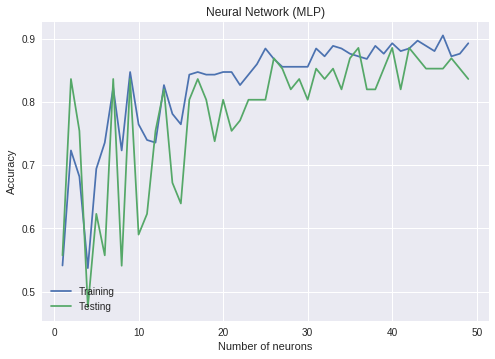

In [0]:
# Neural Network test on number of neurons per layer
traindata = []
testdata = []
layersizes = []

for i in range(1,50):
  x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)
  mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(i,), max_iter=100)
  mlp.fit(x_train,y_train)
  
  layersizes.append(i)
  traindata.append(mlp.score(x_train,y_train))
  testdata.append(mlp.score(x_test,y_test))
  
plt.title('Neural Network (MLP)')
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.plot(layersizes, traindata, label="Training")
plt.plot(layersizes, testdata, label="Testing")
plt.legend(loc='lower left')

print("Number of neurons when max accuracy: {:.2f}".format(testdata.index(max(testdata))+1))
print("Maximum Score using Neural Network is {:.2f}%".format((max(testdata))*100))

Neural Network prediction for 303 inputs in 0.10548973083496094s
Best accuracy: 91.80327868852459%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

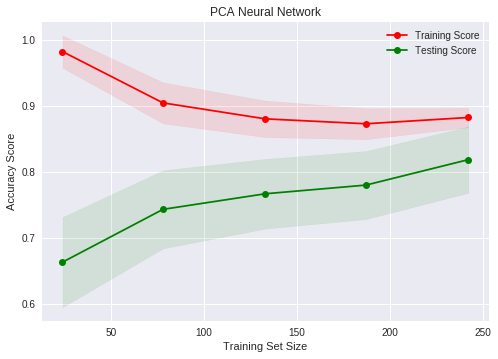

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(36,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "PCA Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.08485674858093262s
Best accuracy: 86.88524590163934%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

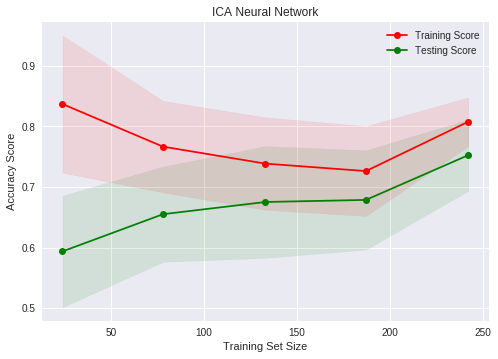

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(12,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "ICA Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.07753348350524902s
Best accuracy: 85.24590163934425%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

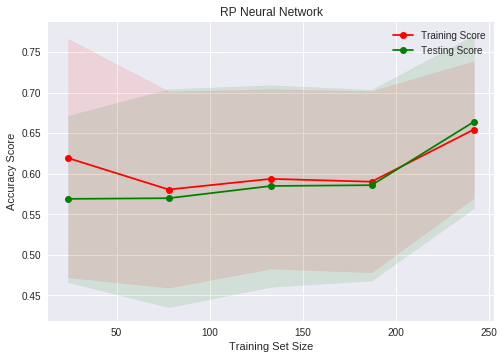

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(7,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "RP Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.09848332405090332s
Best accuracy: 95.08196721311475%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

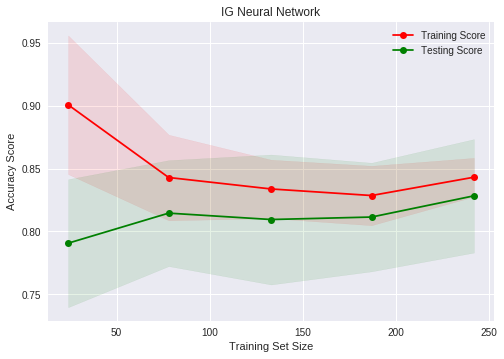

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(31,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "IG Neural Network", x, y, n_jobs=-1)

## **Neural Network on Clustering Algorithms**

In [0]:
data = pd.read_csv('/content/drive/My Drive/ml3/heart_na_em.csv')
# Split data into X and y
x = data.drop(["target"] , axis=1)
y = data["target"].values
# Normalization
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

Number of neurons when max accuracy: 23.00
Maximum Score using Neural Network is 90.16%


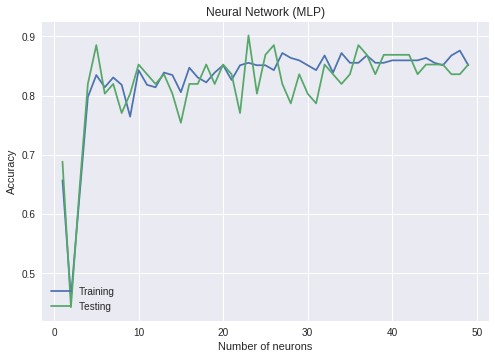

In [0]:
# Neural Network test on number of neurons per layer
traindata = []
testdata = []
layersizes = []

for i in range(1,50):
  x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)
  mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(i,), max_iter=100)
  mlp.fit(x_train,y_train)
  
  layersizes.append(i)
  traindata.append(mlp.score(x_train,y_train))
  testdata.append(mlp.score(x_test,y_test))
  
plt.title('Neural Network (MLP)')
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.plot(layersizes, traindata, label="Training")
plt.plot(layersizes, testdata, label="Testing")
plt.legend(loc='lower left')

print("Number of neurons when max accuracy: {:.2f}".format(testdata.index(max(testdata))+1))
print("Maximum Score using Neural Network is {:.2f}%".format((max(testdata))*100))

Neural Network prediction for 303 inputs in 0.16460537910461426s
Best accuracy: 93.44262295081968%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

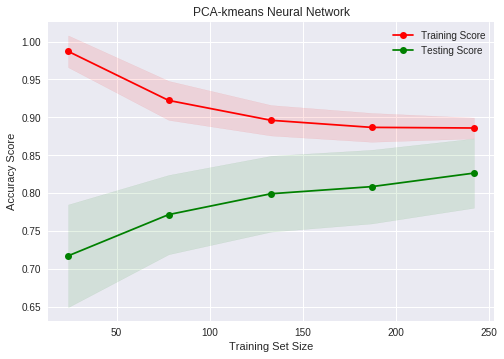

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(48,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "PCA-kmeans Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.09107422828674316s
Best accuracy: 90.1639344262295%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

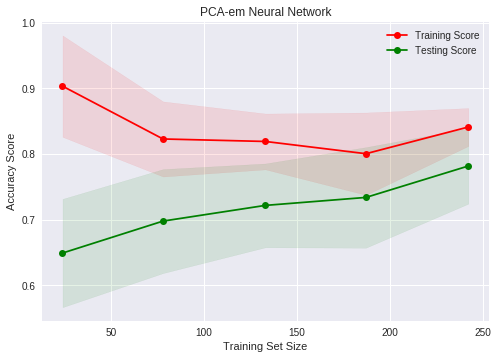

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(18,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "PCA-em Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.10574173927307129s
Best accuracy: 93.44262295081968%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

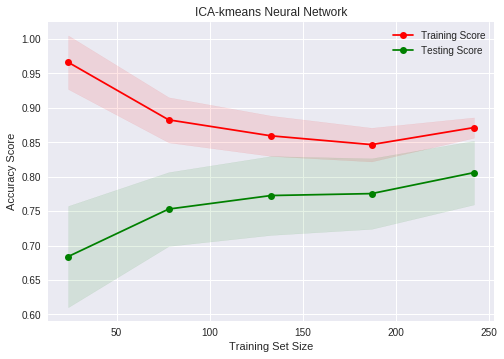

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(28,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "ICA-kmeans Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.1042628288269043s
Best accuracy: 90.1639344262295%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

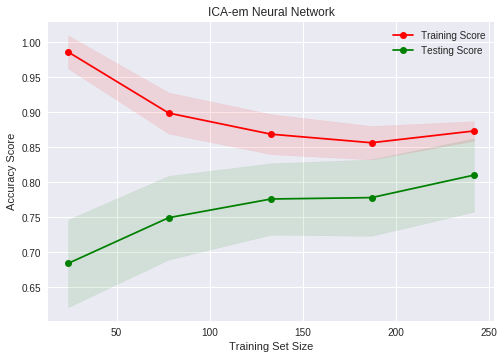

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(35,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "ICA-em Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.08317828178405762s
Best accuracy: 88.52459016393442%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

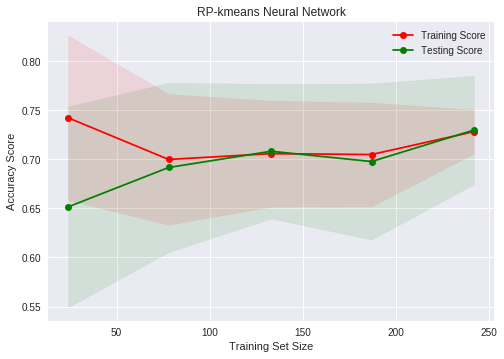

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(20,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "RP-kmeans Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.07816219329833984s
Best accuracy: 85.24590163934425%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

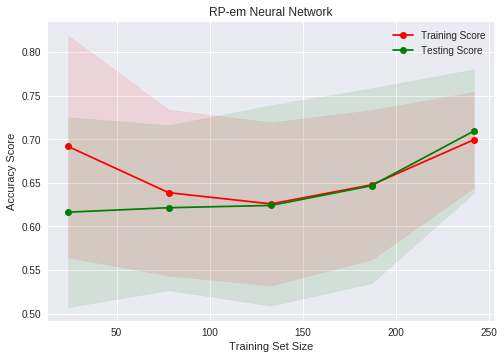

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(11,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "RP-em Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.0840458869934082s
Best accuracy: 91.80327868852459%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

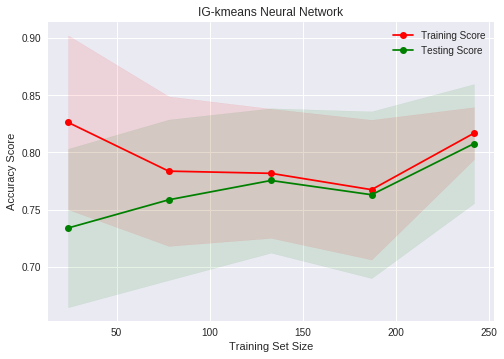

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(14,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "IG-kmeans Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.07514786720275879s
Best accuracy: 86.88524590163934%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

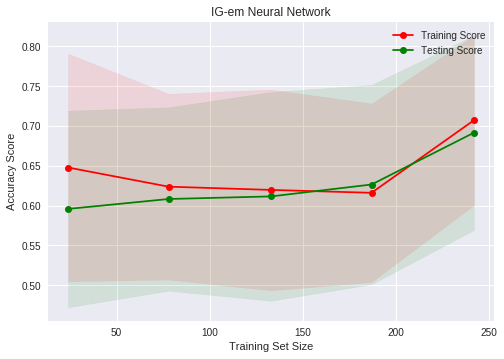

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(4,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "IG-em Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.09273552894592285s
Best accuracy: 91.80327868852459%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

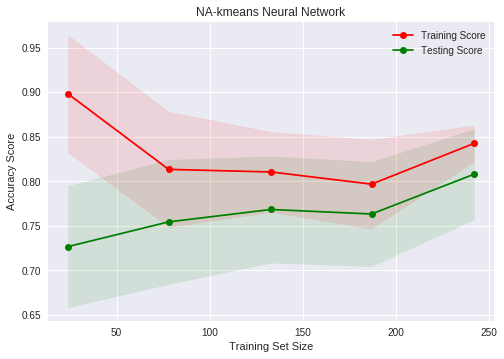

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(15,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "NA-kmeans Neural Network", x, y, n_jobs=-1)

Neural Network prediction for 303 inputs in 0.09748601913452148s
Best accuracy: 93.44262295081968%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

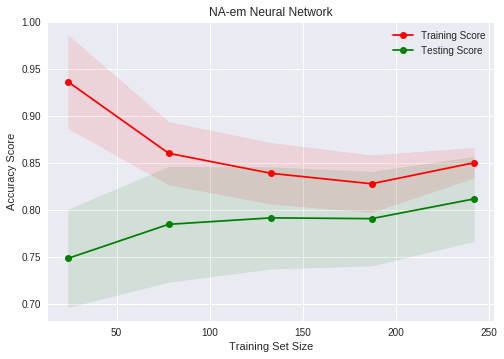

In [0]:
# NN test with optimal number of neurons
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(23,), max_iter=100)
plot_learning_curve(clf, "Neural Network", "NA-em Neural Network", x, y, n_jobs=-1)